In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD, Adam
from keras.utils import np_utils
from keras.datasets import mnist

In [2]:
#load data
df_train = pd.read_csv('C:/Users/user/workspace/data/digit-recognizer/train.csv')
df_test = pd.read_csv('C:/Users/user/workspace/data/digit-recognizer/test.csv')

In [3]:
print(type(df_train), '\t', type(df_test))
print(df_train.shape, '\t', df_test.shape)
df_train.head(5)

<class 'pandas.core.frame.DataFrame'> 	 <class 'pandas.core.frame.DataFrame'>
(42000, 785) 	 (28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x=df_train.drop(['label'], axis='columns')
y=df_train['label']
#df_train.head(5)

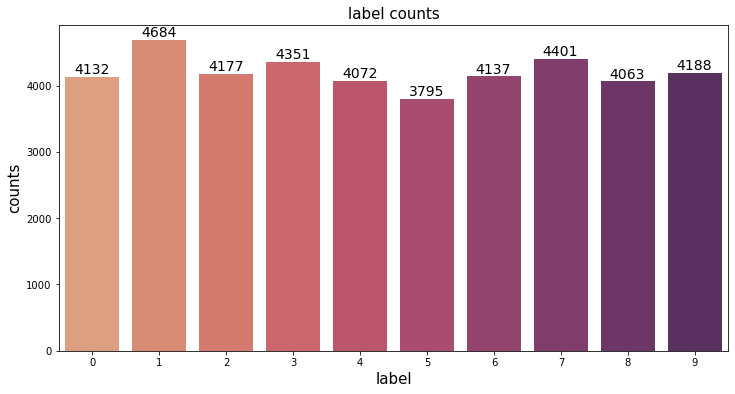

In [5]:
#data visualization: number counts
plt.figure(figsize=(12,6))
ax=sns.countplot(x='label', data=df_train, palette='flare')
plt.xlabel('label', fontsize=15)
plt.ylabel('counts', fontsize=15)
#sns.countplot(x=y)
plt.title('label counts', fontsize=15)
for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.13, p.get_height()+50), fontsize=14)
plt.show()

In [6]:
#check missing value
np.where(np.isnan(df_train)) #no missing value

(array([], dtype=int64), array([], dtype=int64))

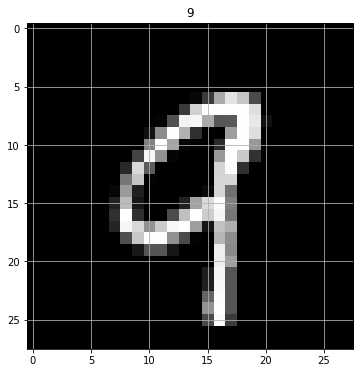

In [7]:
# plot sample
plt.figure(figsize=(8,6))
img = x.iloc[42000-1].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(df_train.iloc[42000-1,0])
plt.grid()
plt.show()

In [8]:
#transfer dataframe to numpy array(train data)
dvec=DictVectorizer(sparse=False)
x1=dvec.fit_transform(x.to_dict(orient='records'))
x1=x1/255.0
x1=x1.astype('float32')
#print(x1)
#print(x1.shape)
#print(type(x1))

#transfer y's type to categorical
y1 = keras.utils.to_categorical(y, num_classes=10)
#print(y1)

x_train, x_test, y_train, y_test=train_test_split(x1, y1, random_state=1, train_size=0.8)
print(x_train.shape, x_test.shape)

(33600, 784) (8400, 784)


In [9]:
#DNN model
model=Sequential()
model.add(Dense(600, activation='relu', input_dim=28*28))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1), metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=100, epochs=20)

result=model.evaluate(x_test, y_test)
print('prediction acc:', result[1])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 600)               471000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6010      
Total params: 477,010
Trainable params: 477,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
336/336 [==============================] - 3s 5ms/step - loss: 0.7887 - accuracy: 0.7939
Epoch 2/20
336/336 [==============================] - 2s 5ms/step - loss: 0.2868 - accuracy: 0.9206
Epoch 3/20
336/336 [==============================] - 2s 5ms/step - loss: 0.2322 - accuracy: 0.9360
Epoch 4/20
336/336 [==============================] - 2s 5ms/step - loss: 0.1888 - accuracy: 0.9477
Epoch 5/20
336/336 [==============================] - 2s 5ms/step - loss: 0.1564 - accuracy: 0.9579
Epoch 6/20
3

In [10]:
y_prob=model.predict(x_test)
print(y_prob.shape)

y_predict=np.argmax(y_prob, axis=1)
print(y_predict.shape)

print(y_predict[0:10], '\n', np.argmax(y_test, axis=1)[0:10])

(8400, 10)
(8400,)
[1 5 2 8 4 4 0 4 4 8] 
 [1 5 2 8 4 4 0 4 4 8]


In [11]:
#CNN model
model2=Sequential()
model2.add(Conv2D(filters=25, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(28,28,1)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(300, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.summary()

model2.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1), metrics=['accuracy'])

model2.fit(x_train.reshape(-1,28,28,1), y_train, batch_size=100, epochs=20)

result2=model2.evaluate(x_test.reshape(-1,28,28,1), y_test)
print('prediction acc:', result2[1])
#x_train.reshape(-1,28,28,1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 25)        250       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 25)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 25)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4900)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               1470300   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3010      
Total params: 1,473,560
Trainable params: 1,473,560
Non-trainable params: 0
____________________________________________

In [12]:
#transfer dataframe to numpy array(test data)
dvec=DictVectorizer(sparse=False)
x_testdata=dvec.fit_transform(df_test.to_dict(orient='records'))
x_testdata=x_testdata/255.0
x_testdata=x_testdata.astype('float32')
print(np.max(x_testdata[0]))
print(x_testdata.shape)
print(type(x_testdata))

1.0
(28000, 784)
<class 'numpy.ndarray'>


In [13]:
#prediction of test data (model: DNN)
y_testdata_predict=model.predict(x_testdata)
y_testdata_predict=np.argmax(y_testdata_predict, axis=1)

print(y_testdata_predict.shape)

print(df_test.shape[0])

output1=pd.DataFrame({
    'ImageId':np.arange(1, df_test.shape[0]+1),
    'Label':y_testdata_predict
})

print(output1.head(5))
output1.to_csv("C:/Users/user/workspace/data/digit-recognizer/submission_DNN.csv", index=False)

(28000,)
28000
   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3


In [14]:
#prediction of test data(model2: CNN)
y_testdata_predict2=model2.predict(x_testdata.reshape(-1,28,28,1))
y_testdata_predict2=np.argmax(y_testdata_predict2, axis=1)

print(y_testdata_predict2.shape)

print(df_test.shape[0])

output2=pd.DataFrame({
    'ImageId':np.arange(1, df_test.shape[0]+1),
    'Label':y_testdata_predict2
})

print(output2.head(5))
output2.to_csv("C:/Users/user/workspace/data/digit-recognizer/submission_CNN.csv", index=False)

(28000,)
28000
   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      9
4        5      3
